# 9. 대응 표본 t-검정

### 설정

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [3]:
!apt-get install -y fonts-nanum
!fc-chache -fv
!rm ~/.cache/matplotlib -rf

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'fc-chache' is not recognized as an internal or external command,
operable program or batch file.


'rm' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [19]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기

In [7]:
pst_df = pd.read_csv('./data/06_1.PST.csv', encoding = 'cp949')
pst_df.head()

,사전,사후1,사후2,사후3
0,83.69,77.01,79.11,69.11
1,71.80,69.03,71.13,61.13
2,78.45,71.03,73.13,63.13
3,75.11,71.04,73.14,73.14
4,78.19,71.06,73.16,73.16


In [8]:
pst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사전      50 non-null     float64
 1   사후1     50 non-null     float64
 2   사후2     50 non-null     float64
 3   사후3     50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [9]:
pst_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
사전,50.0,73.038,7.004,54.03,71.718,75.270,76.120,83.69
사후1,50.0,70.248,6.912,50.12,69.053,71.200,74.312,77.33
사후2,50.0,72.348,6.912,52.22,71.152,73.300,76.412,79.43
사후3,50.0,71.748,7.138,52.22,70.315,73.245,76.252,79.43


## 통계분석

### 4.1. 차이가 있는 경우 (양측 검정)

In [12]:
# paired = true
pg.ttest(pst_df['사후1'], pst_df['사전'],
        paired = True,
          alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-7.193,49,two-sided,0.0,"[-3.57, -2.01]",0.401,3.564e+06,0.794


In [ ]:
# one sample T-test

pst_df['차이1'] = pst_df['사후1'] - pst_df['사전']

pg.ttest(pst_df['차이1'], 0, alternative = 'two-sided').round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-7.193,49,two-sided,0.0,"[-3.57, -2.01]",1.017,3.564e+06,1.0


cohen-d 와 power 값이 차이가 나지만 둘 다 사용 가능

### 4.2. 양측과 단측 검정 비교

In [ ]:
# 양측 검정 : 차이가 없는 경우

pg.ttest(pst_df['사후2'], pst_df['사전'],
        paired = True,
          alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.779,49,two-sided,0.081,"[-1.47, 0.09]",0.099,0.663,0.106


p값이 0.081로 차이가 없음

In [14]:
# 단측 검정(less)로 변경하면 차이가 있음

pg.ttest(pst_df['사후2'], pst_df['사전'],
        paired = True,
          alternative = "less").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.779,49,less,0.041,"[-inf, -0.04]",0.099,1.325,0.17


p값이 0.041로 귀무가설 채택, 차이가 있음.

단측 검정을 하면 양측 검정의 p값이 두 배가 될 수 있음

## 6. 정규성 검정

In [15]:
pg.normality(pst_df)

,W,pval,normal
사전,0.824519,3.381430e-06,False
사후1,0.766022,1.572262e-07,False
사후2,0.766022,1.572262e-07,False
사후3,0.810415,1.536419e-06,False
차이1,0.974911,3.621027e-01,True


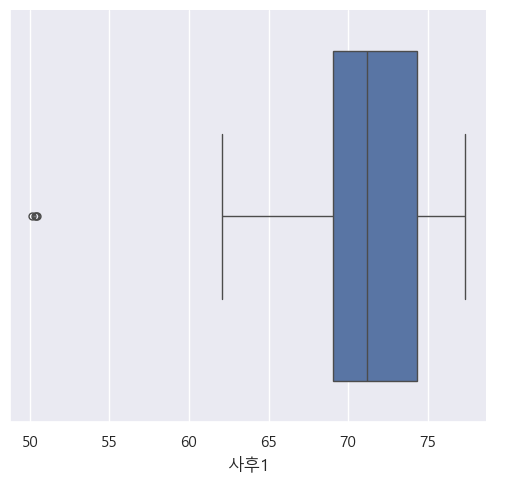

In [21]:
sns.catplot(data = pst_df,
            x = '사후1',
            kind = 'box')
plt.show()

In [22]:
# 데이터 양이 적기 때문에 이상치 제거 하지 않고 비모수 검정

## 6.1 비모수 검정

In [23]:
pg.wilcoxon(pst_df['사후1'], pst_df['사전'],
            alternative = "two-sided").round(3)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,97.0,two-sided,0.0,-0.848,0.34


In [24]:
# 모수통계 (t-test)와 비교
pg.ttest(pst_df['사후3'], pst_df['사전'],
         paired = True,
         alternative = 'two-sided').round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.229,49,two-sided,0.03,"[-2.45, -0.13]",0.182,1.467,0.244
